### Import Libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.frequent_patterns import apriori,association_rules

import warnings
warnings.filterwarnings('ignore')

### Import Data

In [2]:
movie=pd.read_csv('my_movies.csv')
movie.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


### Data Understanding || Data Preprocessing

In [3]:
movie.shape

(10, 15)

In [4]:
movie.isna().sum()

V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [5]:
movie.dtypes

V1               object
V2               object
V3               object
V4               object
V5               object
Sixth Sense       int64
Gladiator         int64
LOTR1             int64
Harry Potter1     int64
Patriot           int64
LOTR2             int64
Harry Potter2     int64
LOTR              int64
Braveheart        int64
Green Mile        int64
dtype: object

In [6]:
movie_df=movie.drop(['V1','V2','V3','V4','V5'],axis=1)
movie_df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [7]:
movie_df.shape

(10, 10)

In [8]:
movie_df.columns

Index(['Sixth Sense', 'Gladiator', 'LOTR1', 'Harry Potter1', 'Patriot',
       'LOTR2', 'Harry Potter2', 'LOTR', 'Braveheart', 'Green Mile'],
      dtype='object')

In [9]:
for i in movie_df.columns:
    print(i)
    print(movie_df[i].value_counts())

Sixth Sense
1    6
0    4
Name: Sixth Sense, dtype: int64
Gladiator
1    7
0    3
Name: Gladiator, dtype: int64
LOTR1
0    8
1    2
Name: LOTR1, dtype: int64
Harry Potter1
0    8
1    2
Name: Harry Potter1, dtype: int64
Patriot
1    6
0    4
Name: Patriot, dtype: int64
LOTR2
0    8
1    2
Name: LOTR2, dtype: int64
Harry Potter2
0    9
1    1
Name: Harry Potter2, dtype: int64
LOTR
0    9
1    1
Name: LOTR, dtype: int64
Braveheart
0    9
1    1
Name: Braveheart, dtype: int64
Green Mile
0    8
1    2
Name: Green Mile, dtype: int64


### Model Building

### Updating minimum support

#### Model 1 : min_support = 0.1, max_len=None, metric='confidence', min_threshold=0.8

In [10]:
frequent_itemsets1=apriori(df=movie_df,min_support=0.1,use_colnames=True,max_len=None)
frequent_itemsets1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [11]:
best_associates_book1=association_rules(df=frequent_itemsets1,metric='confidence',min_threshold=0.8)
best_associates_book1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
...,...,...,...,...,...,...,...,...,...
123,"(LOTR2, Harry Potter1)","(Sixth Sense, LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
124,"(Sixth Sense, LOTR2)","(LOTR1, Harry Potter1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
125,"(LOTR1, Harry Potter1)","(Sixth Sense, LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
126,"(Sixth Sense, LOTR1)","(LOTR2, Harry Potter1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


#### Model 2 : min_support = 0.2, max_len=None,metric='confidence',min_threshold=0.8

In [12]:
frequent_itemsets2=apriori(df=movie_df,min_support=0.2,use_colnames=True,max_len=None)
frequent_itemsets2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Sixth Sense, Green Mile)"


In [13]:
best_associates_book2=association_rules(df=frequent_itemsets2,metric='confidence',min_threshold=0.8)
best_associates_book2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
4,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
5,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
6,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
7,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0


#### Model 3 : min_support = 0.3, max_len=None,metric='confidence',min_threshold=0.8

In [14]:
frequent_itemsets3=apriori(df=movie_df,min_support=0.3,use_colnames=True,max_len=None)
frequent_itemsets3

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Sixth Sense, Gladiator)"
4,0.4,"(Sixth Sense, Patriot)"
5,0.6,"(Patriot, Gladiator)"
6,0.4,"(Patriot, Sixth Sense, Gladiator)"


In [15]:
best_associates_book3=association_rules(df=frequent_itemsets3,metric='confidence',min_threshold=0.8)
best_associates_book3

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf
4,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0


#### Model 4 : min_support = 0.5, max_len=None,metric='confidence',min_threshold=0.8

In [16]:
frequent_itemsets4=apriori(df=movie_df,min_support=0.5,use_colnames=True,max_len=None)
frequent_itemsets4

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Sixth Sense, Gladiator)"
4,0.6,"(Patriot, Gladiator)"


In [17]:
best_associates_book4=association_rules(df=frequent_itemsets4,metric='confidence',min_threshold=0.8)
best_associates_book4

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8


### Updating maximum length

#### Model 5 : min_support = 0.05, max_len=5,metric='confidence',min_threshold=0.8

In [18]:
frequent_itemsets5=apriori(df=movie_df,min_support=0.05,use_colnames=True,max_len=5)
frequent_itemsets5

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [19]:
best_associates_book5=association_rules(df=frequent_itemsets5,metric='confidence',min_threshold=0.8)
best_associates_book5

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
...,...,...,...,...,...,...,...,...,...
123,"(LOTR2, Harry Potter1)","(Sixth Sense, LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
124,"(Sixth Sense, LOTR2)","(LOTR1, Harry Potter1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
125,"(LOTR1, Harry Potter1)","(Sixth Sense, LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
126,"(Sixth Sense, LOTR1)","(LOTR2, Harry Potter1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


#### Model 6 : min_support = 0.05, max_len=4,metric='confidence',min_threshold=0.8

In [20]:
frequent_itemsets6=apriori(df=movie_df,min_support=0.05,use_colnames=True,max_len=4)
frequent_itemsets6

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [21]:
best_associates_book6=association_rules(df=frequent_itemsets6,metric='confidence',min_threshold=0.8)
best_associates_book6

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
...,...,...,...,...,...,...,...,...,...
100,"(LOTR1, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
101,"(LOTR1, Green Mile)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
102,"(LOTR2, Harry Potter1)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
103,"(LOTR2, Green Mile)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


#### Model 7 : min_support = 0.05, max_len=3,metric='confidence',min_threshold=0.8

In [22]:
frequent_itemsets7=apriori(df=movie_df,min_support=0.05,use_colnames=True,max_len=3)
frequent_itemsets7

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [23]:
best_associates_book7=association_rules(df=frequent_itemsets7,metric='confidence',min_threshold=0.8)
best_associates_book7

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
6,(Braveheart),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf


#### Model 8 : min_support = 0.05, max_len=2,metric='confidence',min_threshold=0.8

In [24]:
frequent_itemsets8=apriori(df=movie_df,min_support=0.05,use_colnames=True,max_len=2)
frequent_itemsets8

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [25]:
best_associates_book8=association_rules(df=frequent_itemsets8,metric='confidence',min_threshold=0.8)
best_associates_book8

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(LOTR),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
6,(Braveheart),(Gladiator),0.1,0.7,0.1,1.000000,1.428571,0.03,inf
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(Harry Potter2),(Harry Potter1),0.1,0.2,0.1,1.000000,5.000000,0.08,inf


### Updating minimum threshold for the metric 'Confidence'

#### Model 9 : min_support = 0.05, max_len=4,metric='confidence',min_threshold=0.8

In [26]:
frequent_itemsets9=apriori(df=movie_df,min_support=0.05,use_colnames=True,max_len=4)
frequent_itemsets9

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [27]:
best_associates_book9=association_rules(df=frequent_itemsets9,metric='confidence',min_threshold=0.8)
best_associates_book9

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
2,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
...,...,...,...,...,...,...,...,...,...
100,"(LOTR1, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
101,"(LOTR1, Green Mile)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
102,"(LOTR2, Harry Potter1)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
103,"(LOTR2, Green Mile)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


#### Model 10 : min_support = 0.05, max_len=4,metric='confidence',min_threshold=0.7

In [28]:
frequent_itemsets10=apriori(df=movie_df,min_support=0.05,use_colnames=True,max_len=4)
frequent_itemsets10

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [29]:
best_associates_book10=association_rules(df=frequent_itemsets10,metric='confidence',min_threshold=0.7)
best_associates_book10

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
3,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
4,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
...,...,...,...,...,...,...,...,...,...
101,"(LOTR1, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
102,"(LOTR1, Green Mile)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
103,"(LOTR2, Harry Potter1)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
104,"(LOTR2, Green Mile)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


#### Model 11 : min_support = 0.05, max_len=4,metric='confidence',min_threshold=0.6

In [30]:
frequent_itemsets11=apriori(df=movie_df,min_support=0.05,use_colnames=True,max_len=4)
frequent_itemsets11

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [31]:
best_associates_book11=association_rules(df=frequent_itemsets11,metric='confidence',min_threshold=0.6)
best_associates_book11

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf
...,...,...,...,...,...,...,...,...,...
106,"(LOTR1, Harry Potter1)","(LOTR2, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
107,"(LOTR1, Green Mile)","(LOTR2, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
108,"(LOTR2, Harry Potter1)","(LOTR1, Green Mile)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
109,"(LOTR2, Green Mile)","(LOTR1, Harry Potter1)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf


### Updating metric as support and updating minimum threshold of support

#### Model 12 : min_support = 0.05, max_len=4,metric='support',min_threshold=0.1

In [32]:
frequent_itemsets12=apriori(df=movie_df,min_support=0.05,use_colnames=True,max_len=4)
frequent_itemsets12

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [33]:
best_associates_book12=association_rules(df=frequent_itemsets12,metric='support',min_threshold=0.1)
best_associates_book12

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Sixth Sense),(Harry Potter1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
...,...,...,...,...,...,...,...,...,...
215,"(Harry Potter1, Green Mile)","(LOTR1, LOTR2)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf
216,(LOTR1),"(LOTR2, Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
217,(LOTR2),"(LOTR1, Harry Potter1, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
218,(Harry Potter1),"(LOTR1, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80


#### Model 13 : min_support = 0.05, max_len=4,metric='support',min_threshold=0.2

In [34]:
frequent_itemsets13=apriori(df=movie_df,min_support=0.05,use_colnames=True,max_len=4)
frequent_itemsets13

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [35]:
best_associates_book13=association_rules(df=frequent_itemsets13,metric='support',min_threshold=0.2)
best_associates_book13

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Sixth Sense),(Green Mile),0.6,0.2,0.2,0.333333,1.666667,0.08,1.2
5,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
8,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf


#### Model 14 : min_support = 0.05, max_len=4,metric='support',min_threshold=0.5

In [36]:
frequent_itemsets14=apriori(df=movie_df,min_support=0.05,use_colnames=True,max_len=4)
frequent_itemsets14

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [37]:
best_associates_book14=association_rules(df=frequent_itemsets14,metric='support',min_threshold=0.5)
best_associates_book14

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
3,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8


### Data Visualization

In [38]:
print(frequent_itemsets1.shape)
print(frequent_itemsets2.shape)
print(frequent_itemsets3.shape)
print(frequent_itemsets4.shape)
print(frequent_itemsets5.shape)
print(frequent_itemsets6.shape)
print(frequent_itemsets7.shape)
print(frequent_itemsets8.shape)
print(frequent_itemsets9.shape)
print(frequent_itemsets10.shape)
print(frequent_itemsets11.shape)
print(frequent_itemsets12.shape)
print(frequent_itemsets13.shape)
print(frequent_itemsets14.shape)

(53, 2)
(13, 2)
(7, 2)
(5, 2)
(53, 2)
(52, 2)
(46, 2)
(30, 2)
(52, 2)
(52, 2)
(52, 2)
(52, 2)
(52, 2)
(52, 2)


In [39]:
print(best_associates_book1.shape)
print(best_associates_book2.shape)
print(best_associates_book3.shape)
print(best_associates_book4.shape)
print(best_associates_book5.shape)
print(best_associates_book6.shape)
print(best_associates_book7.shape)
print(best_associates_book8.shape)
print(best_associates_book9.shape)
print(best_associates_book10.shape)
print(best_associates_book11.shape)
print(best_associates_book12.shape)
print(best_associates_book13.shape)
print(best_associates_book14.shape)

(128, 9)
(8, 9)
(5, 9)
(3, 9)
(128, 9)
(105, 9)
(52, 9)
(12, 9)
(105, 9)
(106, 9)
(111, 9)
(220, 9)
(16, 9)
(4, 9)


### Displot

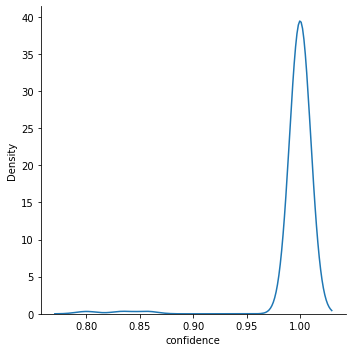

In [40]:
sns.displot(data=best_associates_book1,x='confidence',kind='kde')
plt.show()

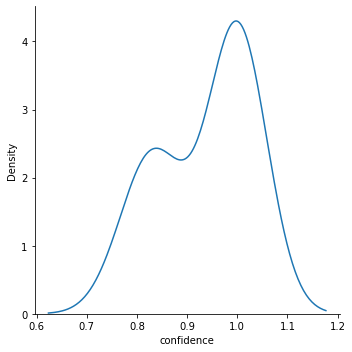

In [41]:
sns.displot(data=best_associates_book2,x='confidence',kind='kde')
plt.show()

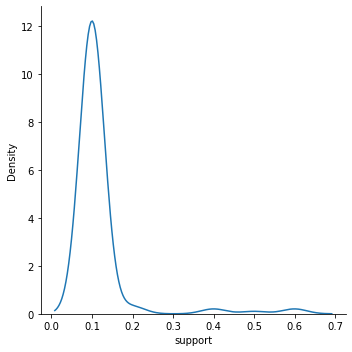

In [42]:
sns.displot(data=best_associates_book1,x='support',kind='kde')
plt.show()

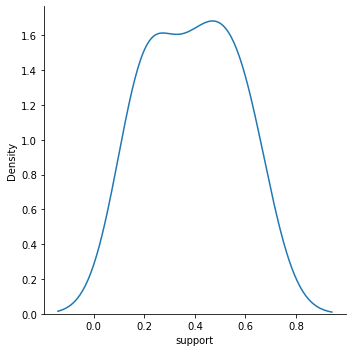

In [43]:
sns.displot(data=best_associates_book2,x='support',kind='kde')
plt.show()

### Heatmap of Confidence and Support

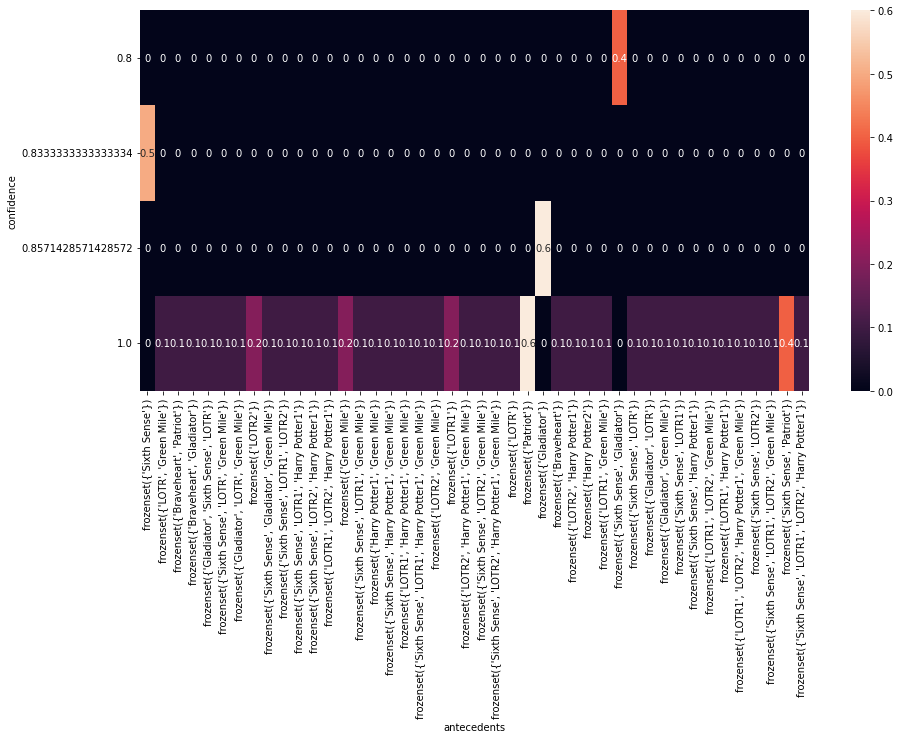

In [44]:
plt.figure(figsize=(15,7))
pivot1=pd.pivot_table(data=best_associates_book1,index='confidence',columns='antecedents',values='support').fillna(0)
sns.heatmap(pivot1,annot=True)
plt.show()

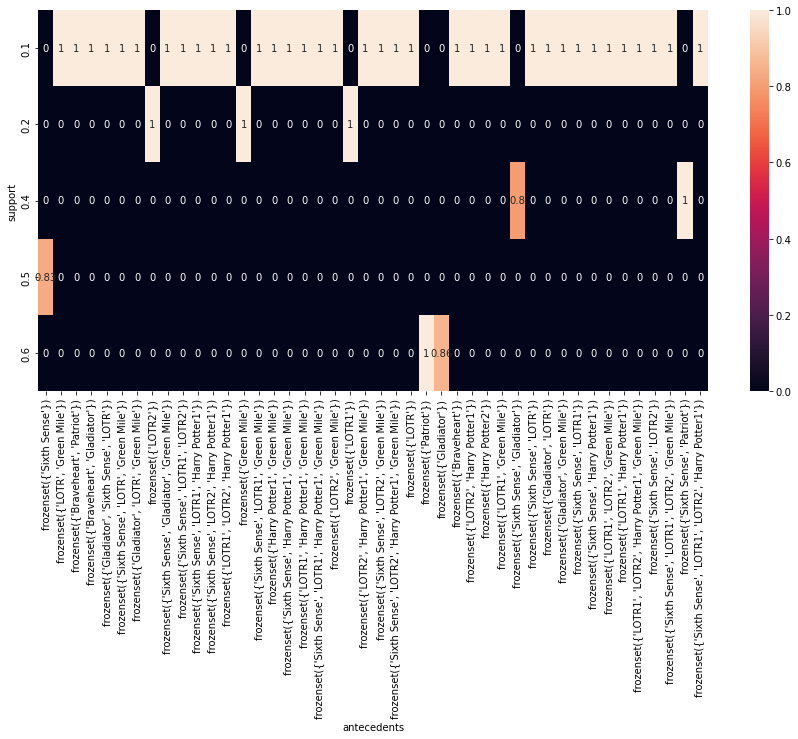

In [45]:
plt.figure(figsize=(15,7))
pivot2=pd.pivot_table(data=best_associates_book5,index='support',columns='antecedents',values='confidence').fillna(0)
sns.heatmap(pivot2,annot=True)
plt.show()

### Updating minimum support

In [46]:
min_support=[0.1,0.2,0.3,0.5]
no_of_frequent_itemsets = [53,13,7,5]
no_of_best_associates = [128,8,5,3]

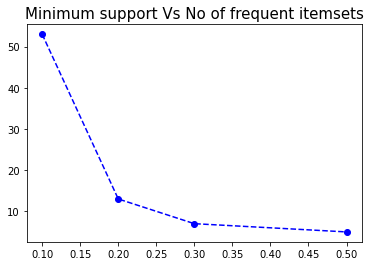

In [47]:
plt.plot(min_support,no_of_frequent_itemsets,marker='o',linestyle='--',color='blue')
plt.title('Minimum support Vs No of frequent itemsets',fontsize=15)
plt.show()

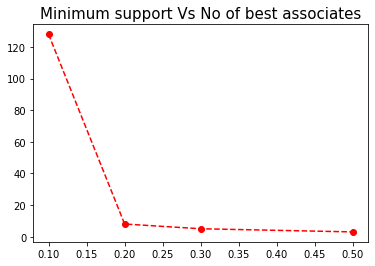

In [48]:
plt.plot(min_support,no_of_best_associates,marker='o',linestyle='--',color='red')
plt.title('Minimum support Vs No of best associates',fontsize=15)
plt.show()

##### As minimum support increases from 0.1 to 0.4, No. of Itemsets and also No. of best associates decreases

### Updating maximum length

In [49]:
max_length=[5,4,3,2]
no_of_frequent_itemsets = [53,52,46,30]
no_of_best_associates = [128,105,52,12]

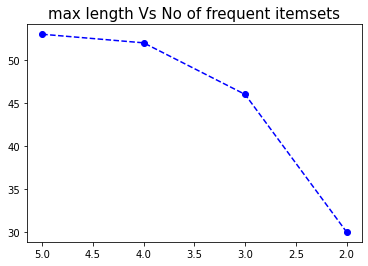

In [50]:
plt.plot(max_length,no_of_frequent_itemsets,marker='o',linestyle='--',color='blue')
plt.title('max length Vs No of frequent itemsets',fontsize=15)
plt.gca().invert_xaxis()
plt.show()

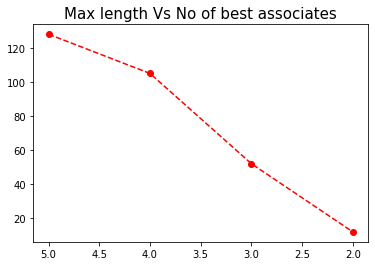

In [51]:
plt.plot(max_length,no_of_best_associates,marker='o',linestyle='--',color='red')
plt.title('Max length Vs No of best associates',fontsize=15)
plt.gca().invert_xaxis()
plt.show()

##### As maximum length decreases from 5 till 2, No. of Itemsets and also No. of best associates decreases

### Updating Minimum threshold of metric 'Confidence'

In [52]:
minimum_threshold =[0.8,0.7,0.6]
no_of_frequent_itemsets = [52,52,52]
no_of_best_associates = [105,106,111]

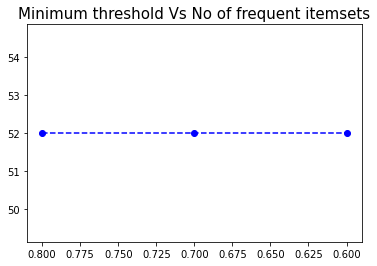

In [53]:
plt.plot(minimum_threshold,no_of_frequent_itemsets,marker='o',linestyle='--',color='blue')
plt.title('Minimum threshold Vs No of frequent itemsets',fontsize=15)
plt.gca().invert_xaxis()
plt.show()

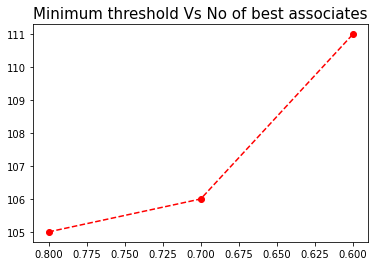

In [54]:
plt.plot(minimum_threshold,no_of_best_associates,marker='o',linestyle='--',color='red')
plt.title('Minimum threshold Vs No of best associates',fontsize=15)
plt.gca().invert_xaxis()
plt.show()

##### As Minimum length for the metric 'confidence' decreases from 0.8 till 0.6, 
* There is no changes in No. of Itemsets
* No. of best associates increases

### Updating metric as 'support' and update minimum threshold of the support

In [55]:
minimum_threshold =[0.1,0.2,0.5]
no_of_frequent_itemsets = [52,52,52]
no_of_best_associates = [220,16,4]

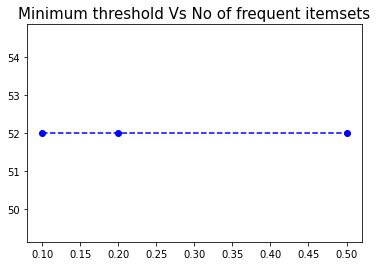

In [56]:
plt.plot(minimum_threshold,no_of_frequent_itemsets,marker='o',linestyle='--',color='blue')
plt.title('Minimum threshold Vs No of frequent itemsets',fontsize=15)
plt.show()

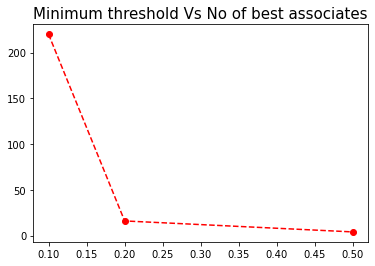

In [57]:
plt.plot(minimum_threshold,no_of_best_associates,marker='o',linestyle='--',color='red')
plt.title('Minimum threshold Vs No of best associates',fontsize=15)
plt.show()

##### As we change the metric as 'support' and increase the threshold from 0.1 to 0.5

* There is no changes in No. of Itemsets
* No. of best associates decreases

### Summary

* As minimum support increases from 0.03 till 0.1, No. of Itemsets and also No. of best associates decreases

* As maximum length decreases from 5 till 2, No. of Itemsets and also No. of best associates decreases

* As Minimum length for the metric 'confidence' decreases from 0.8 till 0.6,
        * There is no changes in No. of Itemsets
        * No. of best associates increases

* As we change the metric as 'support' and increase the threshold from 0.07 to 0.2,
        * There is no changes in No. of Itemsets
        * No. of best associates decreases

### End !!!